In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv.imread('./RoadLanes_3.jpg')

while True:
    cv.imshow('Road lane', img)
    if cv.waitKey(0) == ord('q'):
        break
cv.destroyAllWindows()

In [3]:
roadLaneImage = np.copy(img)
grayScaleImage = cv.cvtColor(roadLaneImage, cv.COLOR_RGB2GRAY)

while True:
    cv.imshow('Grayscale lane', grayScaleImage)
    if cv.waitKey(0) == ord('q'):
        break
cv.destroyAllWindows()

In [4]:
blur = cv.GaussianBlur(grayScaleImage, (5,5), 0)

while True:
    cv.imshow('Blurred Image', blur)
    if cv.waitKey(0) == ord('q'):
        break
cv.destroyAllWindows()

In [5]:
minThreshold = 50
maxThreshold = 100
canny = cv.Canny(blur, minThreshold, maxThreshold, L2gradient=False)

while True:
    cv.imshow('Canny Image', canny)
    if cv.waitKey(0) == ord('q'):
        break
cv.destroyAllWindows()

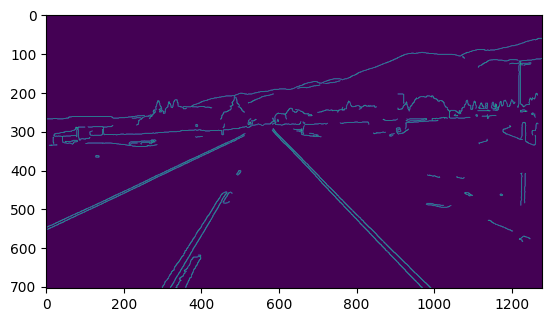

In [6]:
plt.imshow(canny)

In [7]:
canny.shape

(704, 1279)

In [8]:
def roi(image):
    height, width = image.shape[0], image.shape[1]
    polygon = np.array([ [380,280], [0,570],[0,height],[width,height], [width,550],[600,290] ])
    
    mask = np.zeros_like(image)
    cv.fillPoly(mask, [polygon], 255)
    maskedImage = cv.bitwise_and(mask, image)
    
    return maskedImage

croppedImage = roi(canny)

while True:
    cv.imshow('Cropped Image', croppedImage)
    if cv.waitKey(0) == ord('q'):
        break
cv.destroyAllWindows()

In [9]:
def display(image, lines):
    line_image = np.zeros_like(image)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line.reshape(4)
            cv.line(line_image, (x1,y1), (x2,y2), (255,0,0), 10)
    return line_image

In [10]:
rho = 2
theta = np.pi/180
threshold = 100
min_line_length = 50
max_line_gap = 20
line_image = np.zeros_like(img)

lines = cv.HoughLinesP(croppedImage, rho, theta,
                       threshold, min_line_length, max_line_gap)

line_image = display(roadLaneImage, lines)

final_image= cv.addWeighted(roadLaneImage, 0.8, line_image, 1, 1)

while True:
    cv.imshow('Final Image', final_image)
    if cv.waitKey(0) == ord('q'):
        break
cv.destroyAllWindows()